# CH4 EXPLORATORY DATA ANALYSIS

# 4.2.1 Create a Bar Graph with Overlay

In [9]:
import pandas as pd
bank_train = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/bank_marketing_training")

In [10]:
crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])
crosstab_01

response,no,yes
previous_outcome,,
failure,2390,385
nonexistent,21176,2034
success,320,569


<AxesSubplot:xlabel='previous_outcome'>

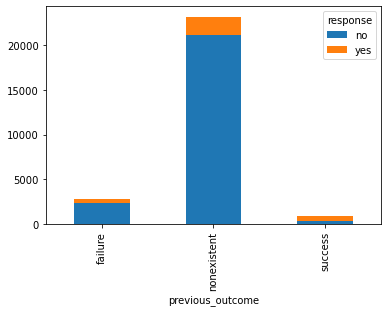

In [11]:
crosstab_01.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='previous_outcome'>

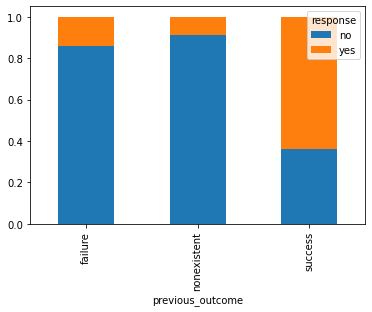

In [19]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True)


# 4.3.1 Create Contingency Table

In [21]:
crosstab_01 = pd.crosstab(bank_train['previous_outcome'], bank_train['response'])
crosstab_01

response,no,yes
previous_outcome,,
failure,2390,385
nonexistent,21176,2034
success,320,569


In [23]:
crosstab_02 = pd.crosstab(bank_train['response'], bank_train['previous_outcome'])
crosstab_02

previous_outcome,failure,nonexistent,success
response,,,
no,2390,21176,320
yes,385,2034,569


In [32]:
round(crosstab_02.div(crosstab_02.sum(0), axis=1)*100, 1)

previous_outcome,failure,nonexistent,success
response,,,
no,86.1,91.2,36.0
yes,13.9,8.8,64.0


# 4.4.1 Create a Histogram

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
bt_age_y = bank_train[bank_train.response == "yes"]['age']
bt_age_n = bank_train[bank_train.response == "no"]['age']

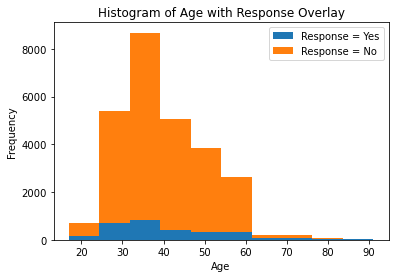

In [59]:
plt.hist([bt_age_y, bt_age_n], bins=10, stacked=True)
plt.legend(['Response = Yes', 'Response = No'])
plt.title("Histogram of Age with Response Overlay")
plt.xlabel('Age'); plt.ylabel('Frequency'); plt.show()

array([[ 175.,  709.,  840.,  391.,  318.,  308.,   91.,   89.,   49.,
          18.],
       [ 710., 5402., 8677., 5042., 3856., 2649.,  219.,  194.,   87.,
          38.]])

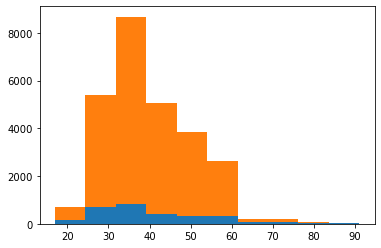

In [73]:
(n, bins, patches) = plt.hist([bt_age_y, bt_age_n], bins=10, stacked=True)
n

In [65]:
n_table = np.column_stack((n[0], n[1]))
n_table

array([[ 175.,  710.],
       [ 709., 5402.],
       [ 840., 8677.],
       [ 391., 5042.],
       [ 318., 3856.],
       [ 308., 2649.],
       [  91.,  219.],
       [  89.,  194.],
       [  49.,   87.],
       [  18.,   38.]])

In [49]:
n_norm = n_table / n_table.sum(axis=1)[:,None]
n_norm

array([[0.19774011, 0.80225989],
       [0.11602029, 0.88397971],
       [0.08826311, 0.91173689],
       [0.07196761, 0.92803239],
       [0.07618591, 0.92381409],
       [0.10415962, 0.89584038],
       [0.29354839, 0.70645161],
       [0.31448763, 0.68551237],
       [0.36029412, 0.63970588],
       [0.32142857, 0.67857143]])

In [53]:
ourbins = np.column_stack((bins[0:10], bins[1:11]))
ourbins

array([[17. , 24.4],
       [24.4, 31.8],
       [31.8, 39.2],
       [39.2, 46.6],
       [46.6, 54. ],
       [54. , 61.4],
       [61.4, 68.8],
       [68.8, 76.2],
       [76.2, 83.6],
       [83.6, 91. ]])

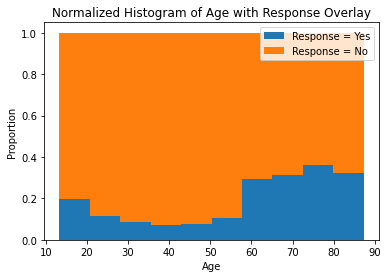

In [68]:
p1 = plt.bar(x=ourbins[:,0], height=n_norm[:,0], width=ourbins[:,1]-ourbins[:,0])
p2 = plt.bar(x=ourbins[:,0], height=n_norm[:,1], width=ourbins[:,1]-ourbins[:,0], bottom=n_norm[:,0])
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Normalized Histogram of Age with Response Overlay')
plt.xlabel('Age'); plt.ylabel('Proportion'); 
plt.show()

# 4.5.1 Perform Binning based on Predictive Value

In [77]:
import pandas as pd
bank_train['age_binned'] = pd.cut(x=bank_train['age'], bins=[0,27,60.01,100], labels=["Under 27", "27 to 60", "Over 60"],
                                  right=False)

response,no,yes
age_binned,,
Under 27,1255,322
27 to 60,22315,2399
Over 60,316,267


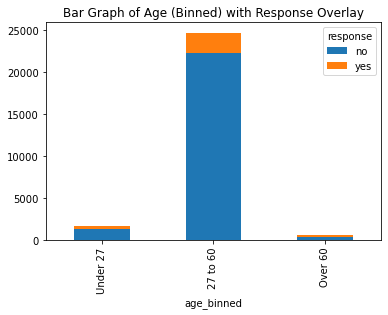

In [80]:
crosstab_02 = pd.crosstab(bank_train['age_binned'], bank_train['response'])
crosstab_02.plot(kind='bar', stacked=True, title='Bar Graph of Age (Binned) with Response Overlay')
crosstab_02

<AxesSubplot:xlabel='age_binned'>

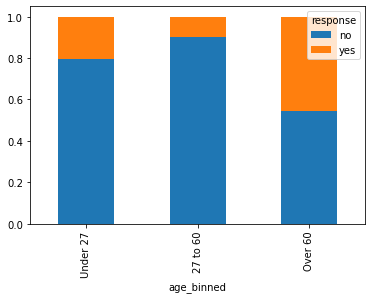

In [79]:
crosstab_norm = crosstab_02.div(crosstab_02.sum(1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True)

# HANDS-ON ANALYSIS

# 4.21
Produce following graphs

In [126]:
import pandas as pd
bank_train = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/bank_marketing_training")

# (a) Bar graph of 'marital'

<AxesSubplot:>

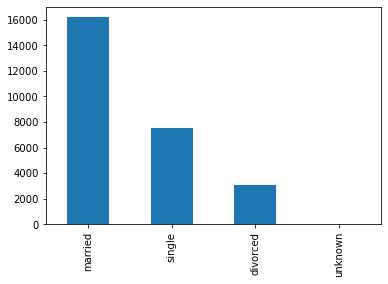

In [129]:
marital_freq = bank_train['marital'].value_counts()
marital_freq.plot(kind='bar')

# (b) Bar graph of 'marital', with overlay of 'response'

<AxesSubplot:xlabel='marital'>

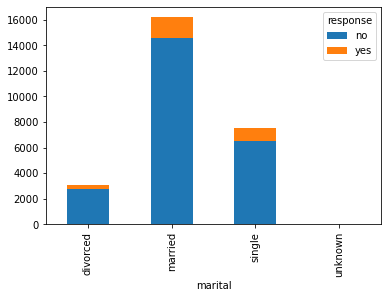

In [130]:
crosstab_21 = pd.crosstab(bank_train['marital'], bank_train['response'])
crosstab_21.plot(kind='bar', stacked = True)

# (c) Normalized bar graph of 'marital', with overlay 'response'

<AxesSubplot:xlabel='marital'>

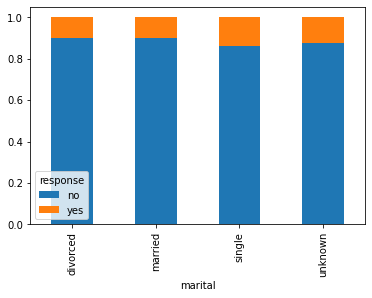

In [132]:
crosstab_21_norm = crosstab_21.div(crosstab_21.sum(1), axis=0)
crosstab_21_norm.plot(kind='bar', stacked=True)

# 4.22
Describe 4.21 graphs

Single people more likely respond yes than others.

# 4.23

# (a) Build Contingency Table (Counts / Percentage)

In [134]:
crosstab_23 = pd.crosstab(bank_train['response'], bank_train['marital'])
crosstab_23

marital,divorced,married,single,unknown
response,,,,
no,2743,14579,6514,50
yes,312,1608,1061,7


In [135]:
round(crosstab_23.div(crosstab_23.sum(0), axis=1)*100, 1)

marital,divorced,married,single,unknown
response,,,,
no,89.8,90.1,86.0,87.7
yes,10.2,9.9,14.0,12.3


# (b) Describe Contingency Table
Most respondents are married people as you can see counts.
Most people responds 'No' especially married people. Single people more likely respond yes compared to others.

# 4.24
Produce contingency table with row percentage, and explain difference

In [141]:
crosstab_24 = pd.crosstab(bank_train['response'], bank_train['marital'])
round(crosstab_24.div(crosstab_24.sum(1), axis=0)*100, 1)

marital,divorced,married,single,unknown
response,,,,
no,11.5,61.0,27.3,0.2
yes,10.4,53.8,35.5,0.2


Although 90% of married people answer 'No', most people who answer 'Yes' are also married people. 

# 4.25
Produce following graphs

# (a) Histogram of 'duration'

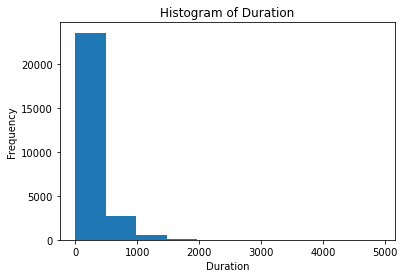

In [177]:
import numpy as np
import matplotlib.pyplot as plt

bt_duration = bank_train['duration']

plt.hist(bt_duration, bins=10, stacked=True)
plt.title("Histogram of Duration")
plt.xlabel('Duration'); plt.ylabel('Frequency'); plt.show()

Strength : I can see brief distribution of duration

Weakness : I can't see either they answer yes or no in the same duration.

# (b) Histogram of 'duration', with overlay 'response'

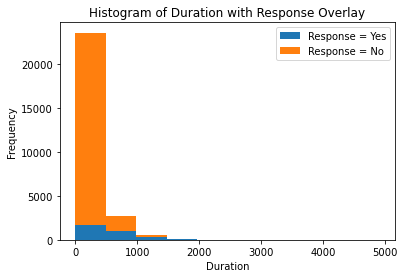

In [176]:
import numpy as np
import matplotlib.pyplot as plt

bt_duration_y = bank_train[bank_train.response == "yes"]['duration']
bt_duration_n = bank_train[bank_train.response == "no"]['duration']

plt.hist([bt_duration_y, bt_duration_n], bins=10, stacked=True)
plt.legend(['Response = Yes', 'Response = No'])
plt.title("Histogram of Duration with Response Overlay")
plt.xlabel('Duration'); plt.ylabel('Frequency'); plt.show()

Strength : I can see both distribution of duration and proportion of response per each bins

Weakness : I can't see the proportion of response which frequency is too low.

# (c) Normalized histogram of 'duration', with overlay 'response'

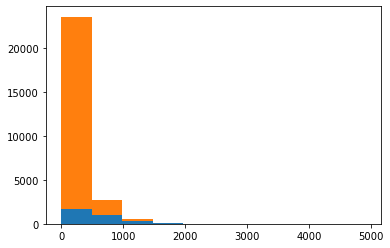

In [174]:
(n, bins, patches) = plt.hist([bt_duration_y, bt_duration_n], bins=10, stacked=True)

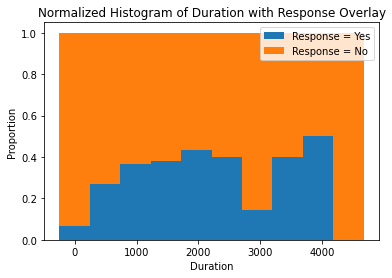

In [175]:
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:,None]
ourbins  = np.column_stack((bins[0:10], bins[1:11]))

p1 = plt.bar(x=ourbins[:,0], height=n_norm[:,0], width=ourbins[:,1]-ourbins[:,0])
p2 = plt.bar(x=ourbins[:,0], height=n_norm[:,1], width=ourbins[:,1]-ourbins[:,0], bottom=n_norm[:,0])
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Normalized Histogram of Duration with Response Overlay')
plt.xlabel('Duration'); plt.ylabel('Proportion'); 
plt.show()

Strength : I can clearly see proportion of response per each duration bins.

Weakness : I can't see counts per each bins.

# 4.26
Describe relationship between 'duration' and 'response'

The percentage of 'Yes' ,which duration range from 0 to 500 and from 2700 to 3300, is very low.

# 4.27
Examine non-normalized and normalized histograms of 'duration', with overlay of 'response' / cutoff point / define new variable 'duration_binned'

In [187]:
import pandas as pd
bank_train['duration_binned'] = pd.cut(x=bank_train['duration'], bins=[0,100,200,500,1000,5000], 
                                       labels=["0 to 100", "100 to 200", "200 to 500", "500 to 1000", "1000 to 5000"],
                                       right=False)

duration_binned,0 to 100,100 to 200,200 to 500,500 to 1000,1000 to 5000
response,,,,,
no,6360,7945,7700,1633,248
yes,46,406,1198,981,357


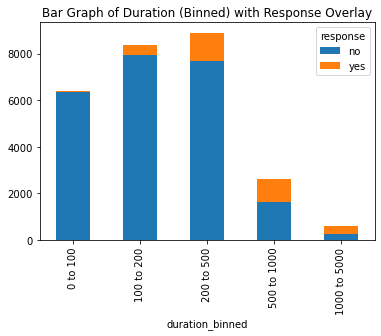

In [195]:
crosstab_27 = pd.crosstab(bank_train['duration_binned'], bank_train['response'])
crosstab_27.plot(kind='bar', stacked=True, title='Bar Graph of Duration (Binned) with Response Overlay')
cont_table_27 = pd.crosstab(bank_train['response'], bank_train['duration_binned'])
cont_table_27

In [196]:
round(cont_table_27.div(cont_table_27.sum(0), axis=1)*100, 1)

duration_binned,0 to 100,100 to 200,200 to 500,500 to 1000,1000 to 5000
response,,,,,
no,99.3,95.1,86.5,62.5,41.0
yes,0.7,4.9,13.5,37.5,59.0


<AxesSubplot:xlabel='duration_binned'>

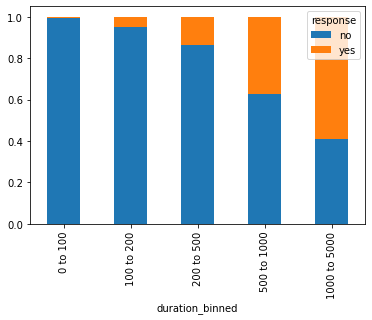

In [189]:
crosstab_norm = crosstab_27.div(crosstab_27.sum(1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True)

# 4.28
Describe 4.27 tables.

# (a) 
Most people's duration is between 0 to 500, and they mostly answer 'No'. 

# (b)
Same

# (c)
As duration increases, the proportion of 'Yes' increases.

# 4.29
Create Contingency Table of 'job' with 'response', with counts and column percentage

In [197]:
crosstab_29 = pd.crosstab(bank_train['response'], bank_train['job'])
crosstab_29

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,5903,5631,842,639,1680,852,825,2380,404,3972,573,185
yes,854,420,72,70,209,291,93,201,194,465,94,25


In [200]:
crosstab_perc_29 = round(crosstab_29.div(crosstab_29.sum(1), axis=0)*100, 1)
crosstab_perc_29

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,24.7,23.6,3.5,2.7,7.0,3.6,3.5,10.0,1.7,16.6,2.4,0.8
yes,28.6,14.1,2.4,2.3,7.0,9.7,3.1,6.7,6.5,15.6,3.1,0.8


# 4.30 ???????????

# (a) Combine 'job' with 'response' percentage: 0<10, 10<25, 25<33 and assign to 'job2'

# (b) Produce Contingency Table of 'job2' with 'response' with counts and column percentage, and Describe

# (c) Produce normalized histograms of 'job2' with 'response', and Describe relationship

In [ ]:
import pandas as pd
bank_train['job2'] = pd.cut(x=bank_train['job'], bins=[0,27,60.01,100], labels=["Under 27", "27 to 60", "Over 60"],
                                  right=False)

In [ ]:
crosstab_02 = pd.crosstab(bank_train['age_binned'], bank_train['response'])
crosstab_02.plot(kind='bar', stacked=True, title='Bar Graph of Age (Binned) with Response Overlay')
crosstab_02

In [ ]:
crosstab_norm = crosstab_02.div(crosstab_02.sum(1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True)

# 4.31
Create Bar graph of 'Manuf' with 'Type' overlay

<AxesSubplot:xlabel='Manuf'>

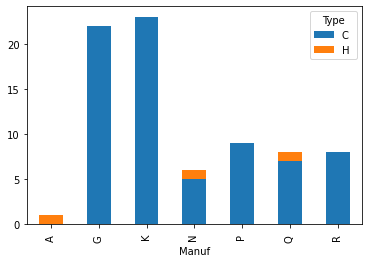

In [225]:
cereals = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/cereals.csv")
crosstab_31 = pd.crosstab(cereals['Manuf'], cereals['Type'])
crosstab_31.plot(kind='bar', stacked = True)

# 4.32
Create Normalized Bar graph of 'Manuf' with 'Type' overlay

<AxesSubplot:xlabel='Manuf'>

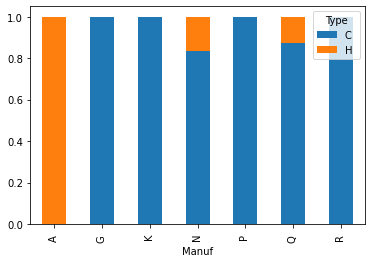

In [209]:
crosstab_31_norm = crosstab_31.div(crosstab_31.sum(1), axis=0)
crosstab_31_norm.plot(kind='bar', stacked=True)

# 4.33
Create Contingency Table of 'Manuf' and 'Type'

In [212]:
crosstab_33 = pd.crosstab(cereals['Type'], cereals['Manuf'])
crosstab_33

Manuf,A,G,K,N,P,Q,R
Type,,,,,,,
C,0,22,23,5,9,7,8
H,1,0,0,1,0,1,0


In [213]:
round(crosstab_33.div(crosstab_33.sum(0), axis=1)*100, 1)

Manuf,A,G,K,N,P,Q,R
Type,,,,,,,
C,0.0,100.0,100.0,83.3,100.0,87.5,100.0
H,100.0,0.0,0.0,16.7,0.0,12.5,0.0


# 4.34
Create Histogram of 'Calories' with 'Manuf' overlay

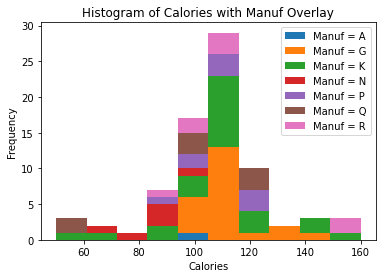

In [343]:
import numpy as np
import matplotlib.pyplot as plt

cal_a = cereals[cereals.Manuf == "A "]['Calories']
cal_g = cereals[cereals.Manuf == "G "]['Calories']
cal_k = cereals[cereals.Manuf == "K "]['Calories']
cal_n = cereals[cereals.Manuf == "N "]['Calories']
cal_p = cereals[cereals.Manuf == "P "]['Calories']
cal_q = cereals[cereals.Manuf == "Q "]['Calories']
cal_r = cereals[cereals.Manuf == "R "]['Calories']

plt.hist([cal_a, cal_g, cal_k, cal_n, cal_p, cal_q, cal_r], bins=10, stacked=True)
plt.legend(['Manuf = A', 'Manuf = G', 'Manuf = K', 'Manuf = N', 'Manuf = P','Manuf = Q', 'Manuf = R',])
plt.title("Histogram of Calories with Manuf Overlay")
plt.xlabel('Calories'); plt.ylabel('Frequency'); plt.show()


# 4.35
Create Normalized Histogram of 'Calories' with 'Manuf' overlay 

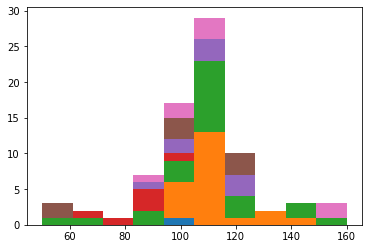

In [445]:
(n, bins, patches) = plt.hist([cal_a, cal_g, cal_k, cal_n, cal_p, cal_q, cal_r], bins=10, stacked=True)

In [446]:
n_table_35 = np.column_stack((n[0], n[1], n[2], n[3], n[4], n[5], n[6]))
n_norm_35 = n_table_35 / n_table_35.sum(axis=1)[:,None]
ourbins_35 = np.column_stack((bins[0:10], bins[1:11]))

In [440]:
#cf) n_norm_35[:,0:3].sum(axis=1)

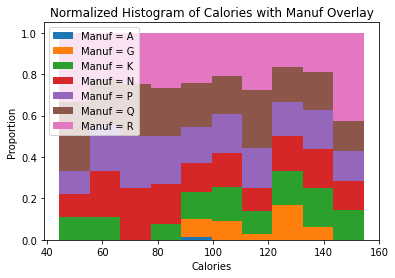

In [447]:
p1 = plt.bar(x=ourbins_35[:,0], height=n_norm_35[:,0], width=ourbins_35[:,1]-ourbins_35[:,0])
p2 = plt.bar(x=ourbins_35[:,0], height=n_norm_35[:,1], width=ourbins_35[:,1]-ourbins_35[:,0], bottom=n_norm_35[:,0])
p3 = plt.bar(x=ourbins_35[:,0], height=n_norm_35[:,2], width=ourbins_35[:,1]-ourbins_35[:,0], bottom=n_norm_35[:,0:2].sum(axis=1))
p4 = plt.bar(x=ourbins_35[:,0], height=n_norm_35[:,3], width=ourbins_35[:,1]-ourbins_35[:,0], bottom=n_norm_35[:,0:3].sum(axis=1))
p5 = plt.bar(x=ourbins_35[:,0], height=n_norm_35[:,4], width=ourbins_35[:,1]-ourbins_35[:,0], bottom=n_norm_35[:,0:4].sum(axis=1))
p6 = plt.bar(x=ourbins_35[:,0], height=n_norm_35[:,5], width=ourbins_35[:,1]-ourbins_35[:,0], bottom=n_norm_35[:,0:5].sum(axis=1))
p7 = plt.bar(x=ourbins_35[:,0], height=n_norm_35[:,6], width=ourbins_35[:,1]-ourbins_35[:,0], bottom=n_norm_35[:,0:6].sum(axis=1))

plt.legend(['Manuf = A', 'Manuf = G', 'Manuf = K', 'Manuf = N', 'Manuf = P', 'Manuf = Q', 'Manuf = R'])
plt.title('Normalized Histogram of Calories with Manuf Overlay')
plt.xlabel('Calories'); plt.ylabel('Proportion'); 
plt.show()

# 4.36
Create bar chart of 'binned calories' with 'Manuf' overlay

In [450]:
import pandas as pd
cereals['cal_binned'] = pd.cut(x=cereals['Calories'], bins=[0,90,110,160], labels=["0-90", "90-110", "110-160"],
                                  right=False)

Manuf,A,G,K,N,P,Q,R
cal_binned,,,,,,,
0-90,0,0,2,2,0,2,0
90-110,1,5,5,4,3,3,3
110-160,0,17,15,0,6,3,5


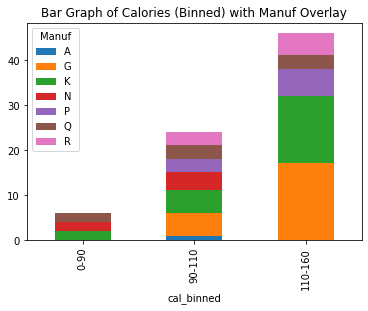

In [452]:
crosstab_36 = pd.crosstab(cereals['cal_binned'], cereals['Manuf'])
crosstab_36.plot(kind='bar', stacked=True, title='Bar Graph of Calories (Binned) with Manuf Overlay')
crosstab_36

<AxesSubplot:xlabel='cal_binned'>

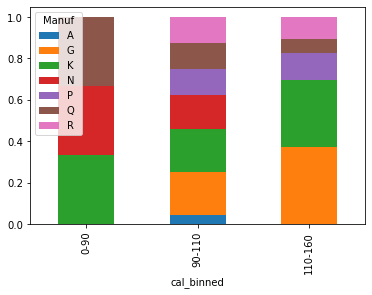

In [453]:
crosstab_norm_36 = crosstab_36.div(crosstab_36.sum(1), axis=0)
crosstab_norm_36.plot(kind='bar', stacked=True)

# 4.37
How many outliers?

In [479]:
adult = pd.read_csv("C:/Users/ronal/Python_Practice/DataSets/adult_ch3_training")

from scipy import stats

adult['capital_loss_z'] =  stats.zscore(adult['capital-loss'])
adult_sort = adult.sort_values(['capital_loss_z'], ascending=False)

In [480]:
adult_caploss_outlier = adult_sort.query('capital_loss_z > 3 | capital_loss_z < -3')
adult_caploss_outlier.shape
# There are 679 outliers 

(679, 10)

# 4.38
Construct Bar graph of 'Income' for outliers from above 4.37

<AxesSubplot:>

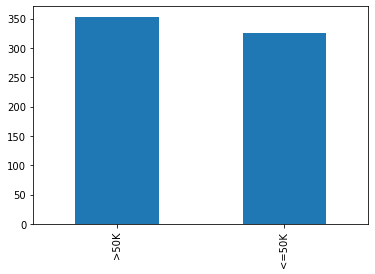

In [486]:
outlier_income_freq = adult_caploss_outlier['income'].value_counts()
outlier_income_freq.plot(kind='bar')

# 4.39
Construct Bar graphof 'Income' for whole dataset

<AxesSubplot:>

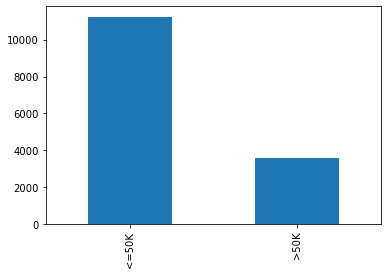

In [487]:
adult_income_freq = adult['income'].value_counts()
adult_income_freq.plot(kind='bar')

# 4.40
Describe above 2 tables of 'income'

Since the number of outliers are fairly smaller than the total population, it seems good to delete outliers

# 4.41
Derive 'capital-loss-flag' either 0 or 1

In [499]:
adult["capital-loss-flag"] = list(map(int, adult["capital-loss"]!=0))
adult.head(n=10)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,capital_loss_z,capital-loss-flag
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,-0.218014,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-0.218014,0
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.218014,0
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,-0.218014,0
5,40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K,-0.218014,0
6,38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K,-0.218014,0
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K,4.807724,1
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K,-0.218014,0
9,39,Private,9,Divorced,Exec-managerial,Male,0,0,<=50K,-0.218014,0


# 4.42
Derive 'capital-gain-flag' either 0 or 1

In [500]:
adult["capital-gain-flag"] = list(map(int, adult["capital-gain"]!=0))
adult.head(n=5)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,capital_loss_z,capital-loss-flag,capital-gain-flag
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,-0.218014,0,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0,0
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-0.218014,0,0
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.218014,0,0
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,-0.218014,0,1


# 4.43
Construct Contingency Table of 'capital-loss-flag' and 'income' with counts and column percentage, and describe cap-loss effect

In [502]:
crosstab_43 = pd.crosstab(adult['income'], adult['capital-loss-flag'])
crosstab_43

capital-loss-flag,0,1
income,,
<=50K,10898,345
>50K,3201,353


In [503]:
round(crosstab_43.div(crosstab_43.sum(0), axis=1)*100, 1)

capital-loss-flag,0,1
income,,
<=50K,77.3,49.4
>50K,22.7,50.6


People who has capital loss are 698, which is much smaller than total counts, 14797. Only 0.03% and 0.09% of <=50K and >50K people respectively has capital loss. Capital loss doesn't seem to affect on income that much.

# 4.44
Construct Contingency Table of 'capital-gain-flag' and 'income' with counts and column percentage, and describe cap-loss effect

In [504]:
crosstab_44 = pd.crosstab(adult['income'], adult['capital-gain-flag'])
crosstab_44

capital-gain-flag,0,1
income,,
<=50K,10774,469
>50K,2791,763


In [505]:
round(crosstab_44.div(crosstab_44.sum(0), axis=1)*100, 1)

capital-gain-flag,0,1
income,,
<=50K,79.4,38.1
>50K,20.6,61.9


Having capital gain seems like effective on income since 20% of >50K people has capital gain

# 4.45
Rename variable 'workclass' as 'workclass-old', 'marital-status' as 'marital-status-old', 'occupation' as 'occupation-old'

In [514]:
adult_re = adult.rename(columns={'workclass':'workclass-old',
                                 'marital-status':'marital-status-old', 
                                 'occupation':'occupation-old'}, 
                        inplace=False)
adult_re.head(n=5)

,age,workclass-old,education,marital-status-old,occupation-old,sex,capital-gain,capital-loss,income,capital_loss_z,capital-loss-flag,capital-gain-flag
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,-0.218014,0,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0,0
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-0.218014,0,0
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.218014,0,0
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,-0.218014,0,1


# 4.46
Construct Contingency Table with 'income' for rows and 'workclass-old' for columns with counts and column percentage

In [516]:
crosstab_46 = pd.crosstab(adult_re['income'], adult_re['workclass-old'])
crosstab_46

workclass-old,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
<=50K,747,275,678,5,8064,219,826,424,5
>50K,82,179,291,0,2217,279,344,162,0


In [517]:
round(crosstab_46.div(crosstab_46.sum(0), axis=1)*100, 1)

workclass-old,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
<=50K,90.1,60.6,70.0,100.0,78.4,44.0,70.6,72.4,100.0
>50K,9.9,39.4,30.0,0.0,21.6,56.0,29.4,27.6,0.0


# 4.47

(a) Provide rationale why we should combine 'never-worked' and 'without-pay' into 'no-pay'

    All three variables means that it doesn't make any income

(b) Provide rationale why we should combine 'local-gov' and 'state-gove' into 'state-local-gov'

    Local gov and state gov has the same meaning

# 4.48
Change "?" to "unknown" in 'workclass' variable

In [551]:
#cf) delete column in DataFrame
#adult_re = adult_re.drop("workclass", axis=1)

In [550]:
adult_re['workclass'] = adult_re['workclass-old'].replace(['?'], 'unknown')
#adult_re[adult_re['workclass'] == 'unknown']
adult_re.head(n=50)

,age,workclass-old,education,marital-status-old,occupation-old,sex,capital-gain,capital-loss,income,capital_loss_z,capital-loss-flag,capital-gain-flag,workclass
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,-0.218014,0,0,Self-emp-not-inc
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0,0,Private
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-0.218014,0,0,Private
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.218014,0,0,Self-emp-not-inc
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,-0.218014,0,1,Private
5,40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K,-0.218014,0,0,Private
6,38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K,-0.218014,0,0,Private
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K,4.807724,1,0,Private
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K,-0.218014,0,0,unknown
9,39,Private,9,Divorced,Exec-managerial,Male,0,0,<=50K,-0.218014,0,0,Private


In [552]:
# for loop으로 어떻게 하지???
#for val in adult_re['workclass-old']:
#    if(val == '?'):
#        adult_re['workclass'] = 'unknown'
#    else:
#        adult_re['workclass'] = val
#adult_re.head(n=50)

# 4.49
Construct Contingency Table with 'income' for rows and 'marital-status-old' for column with counts and column percentage

In [554]:
crosstab_49 = pd.crosstab(adult_re['income'], adult_re['marital-status-old'])
crosstab_49

marital-status-old,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
income,,,,,,,
<=50K,1806,5,3734,184,4663,446,405
>50K,208,6,3037,15,214,26,48


In [555]:
round(crosstab_49.div(crosstab_49.sum(0), axis=1)*100, 1)

marital-status-old,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
income,,,,,,,
<=50K,89.7,45.5,55.1,92.5,95.6,94.5,89.4
>50K,10.3,54.5,44.9,7.5,4.4,5.5,10.6


# 4.50
Provide rationale why we should combine 'Married-AF-spouse' and 'Married-civ-spouse' into 'Married', and combine other statuses into 'Other'

????

# 4.51
Construct Contingency Table with 'income' for rows and 'marital-status' for columns with counts and column percentages 

In [600]:
for i in range(len(adult_re)):
    if adult_re.loc[i,'marital-status-old'] == ('Married-civ-spouse' or 'Married-AF-spouse'):
        adult_re.loc[i, 'marital-status'] = 'Married'
    else:
        adult_re.loc[i, 'marital-status'] = 'Other'
adult_re.head(n=5)

,age,workclass-old,education,marital-status-old,occupation-old,sex,capital-gain,capital-loss,income,capital_loss_z,capital-loss-flag,capital-gain-flag,workclass,marital-status
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,-0.218014,0,0,Self-emp-not-inc,Married
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0,0,Private,Other
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-0.218014,0,0,Private,Other
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.218014,0,0,Self-emp-not-inc,Married
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,-0.218014,0,1,Private,Other


In [601]:
crosstab_51 = pd.crosstab(adult_re['income'], adult_re['marital-status'])
crosstab_51

marital-status,Married,Other
income,,
<=50K,3734,7509
>50K,3037,517


In [602]:
round(crosstab_51.div(crosstab_51.sum(0), axis=1)*100, 1)

marital-status,Married,Other
income,,
<=50K,55.1,93.6
>50K,44.9,6.4


Most people who are in 'Other' marital status earn less than 50K

# 4.52
Construct Contingency Table with 'income' for rows and 'occupation-old' for column with counts and column percentages

In [603]:
crosstab_52 = pd.crosstab(adult_re['income'], adult_re['occupation-old'])
crosstab_52

occupation-old,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,,
<=50K,752,1497,1,1448,912,425,579,793,1461,80,1024,209,1201,291,570
>50K,82,251,0,381,874,46,42,108,57,1,893,102,457,126,134


In [604]:
round(crosstab_52.div(crosstab_52.sum(0), axis=1)*100, 1)

occupation-old,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,,
<=50K,90.2,85.6,100.0,79.2,51.1,90.2,93.2,88.0,96.2,98.8,53.4,67.2,72.4,69.8,81.0
>50K,9.8,14.4,0.0,20.8,48.9,9.8,6.8,12.0,3.8,1.2,46.6,32.8,27.6,30.2,19.0


# 4.53
Provide why combine variables

# 4.54 ????????????????????????????
Combine as 4.53 mentions

In [642]:
#adult_re = adult_re.drop('occupation', axis=1)
#adult_re

In [ ]:
#adult_re['occupation'] = adult_re['occupation-old'].replace(['Exec-managerial'], 'Exec/prof')
#adult_re['occupation'] = adult_re['occupation-old'].replace(['Prof-specialty'], 'Exec/prof')
#adult_re.head(n=50)

In [645]:
for i in range(len(adult_re)):
    if adult_re.loc[i, 'income'] == '>50K':
        adult_re.loc[i,'occupation'] = 'Mid-level'
    else:
        adult_re.loc[i,'occupation'] = 'Low-Level'
adult_re.head(n=10)

KeyError: 14797

In [647]:
#crosstab_54 = pd.crosstab(adult_re['income'], adult_re['occupation'])
#crosstab_54

In [648]:
#round(crosstab_54.div(crosstab_54.sum(0), axis=1)*100, 1)

# 4.55
Provide non-normalized and normalized histogram of 'education' with 'income' overlay

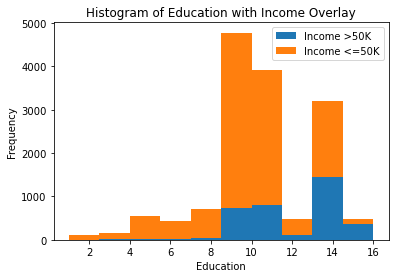

In [651]:
import numpy as np
import matplotlib.pyplot as plt

adult_edu_high = adult_re[adult_re.income == ">50K"]['education']
adult_edu_low = adult_re[adult_re.income == "<=50K"]['education']

plt.hist([adult_edu_high, adult_edu_low], bins=10, stacked=True)
plt.legend(['Income >50K', 'Income <=50K'])
plt.title("Histogram of Education with Income Overlay")
plt.xlabel('Education'); plt.ylabel('Frequency'); plt.show()

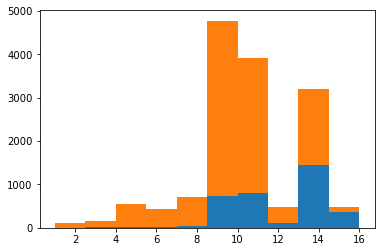

In [654]:
(n, bins, patches) = plt.hist([adult_edu_high, adult_edu_low], bins=10, stacked=True)
n_table_edu = np.column_stack((n[0], n[1]))
n_norm_edu = n_table_edu / n_table_edu.sum(axis=1)[:,None]
ourbins_edu = np.column_stack((bins[0:10], bins[1:11]))

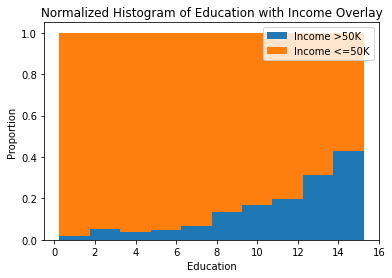

In [655]:
p1 = plt.bar(x=ourbins_edu[:,0], height=n_norm_edu[:,0], width=ourbins_edu[:,1]-ourbins_edu[:,0])
p2 = plt.bar(x=ourbins_edu[:,0], height=n_norm_edu[:,1], width=ourbins_edu[:,1]-ourbins_edu[:,0], bottom=n_norm_edu[:,0])

plt.legend(['Income >50K', 'Income <=50K'])
plt.title('Normalized Histogram of Education with Income Overlay')
plt.xlabel('Education'); plt.ylabel('Proportion'); 
plt.show()

The higher Education level is, the more people earn more than 50K

# 4.56
Provide non-normalized and normalized histogram of 'age' with 'income' overlay

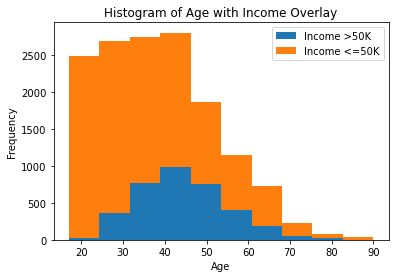

In [656]:
import numpy as np
import matplotlib.pyplot as plt

adult_age_high = adult_re[adult_re.income == ">50K"]['age']
adult_age_low = adult_re[adult_re.income == "<=50K"]['age']

plt.hist([adult_age_high, adult_age_low], bins=10, stacked=True)
plt.legend(['Income >50K', 'Income <=50K'])
plt.title("Histogram of Age with Income Overlay")
plt.xlabel('Age'); plt.ylabel('Frequency'); plt.show()

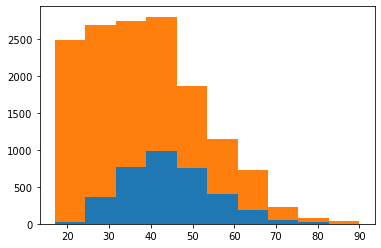

In [657]:
(n, bins, patches) = plt.hist([adult_age_high, adult_age_low], bins=10, stacked=True)
n_table_age = np.column_stack((n[0], n[1]))
n_norm_age = n_table_age / n_table_age.sum(axis=1)[:,None]
ourbins_age = np.column_stack((bins[0:10], bins[1:11]))

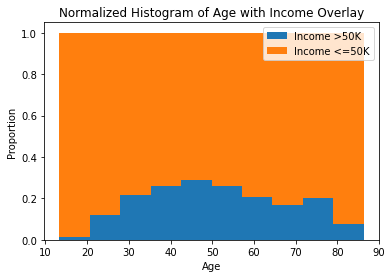

In [658]:
p1 = plt.bar(x=ourbins_age[:,0], height=n_norm_age[:,0], width=ourbins_age[:,1]-ourbins_age[:,0])
p2 = plt.bar(x=ourbins_age[:,0], height=n_norm_age[:,1], width=ourbins_age[:,1]-ourbins_age[:,0], bottom=n_norm_age[:,0])

plt.legend(['Income >50K', 'Income <=50K'])
plt.title('Normalized Histogram of Age with Income Overlay')
plt.xlabel('Age'); plt.ylabel('Proportion'); 
plt.show()

(c) age<30 is entry level, age 30-60 is prime period, and age >60 is retire period

# 4.57 ????????????????
Derive 'age_binned' for above

In [697]:
adult_re[adult_re.age<30].shape

(4385, 16)

In [700]:
adult_re[adult_re.age>=30 and adult_re.age<=60].shape

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [692]:
adult_re[adult_re.age>60].shape

(1072, 16)

In [675]:
import pandas as pd
adult_re['age_binned'] = pd.cut(x=adult_re['age'], bins=[0,30,60,100], labels=["Age<30", "Age 30-60", "Age>60"],
                                  right=False)

income,<=50K,>50K
age_binned,,
Age<30,4158,4158
Age 30-60,4158,4158
Age>60,4158,4158


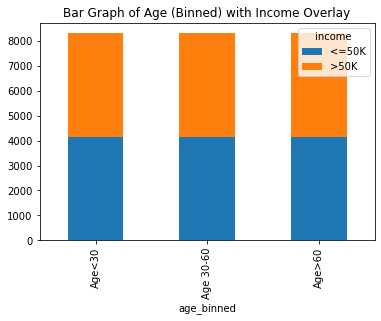

In [701]:
crosstab_57 = pd.crosstab(adult_re['age_binned'], adult_re['income'])
crosstab_57.plot(kind='bar', stacked=True, title='Bar Graph of Age (Binned) with Income Overlay')
crosstab_57

<AxesSubplot:xlabel='age_binned'>

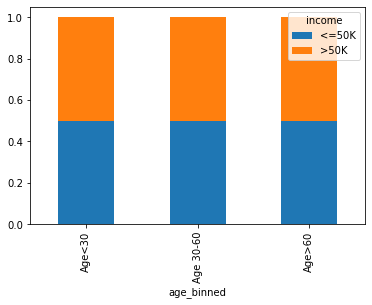

In [702]:
crosstab_norm_57 = crosstab_57.div(crosstab_57.sum(1), axis=0)
crosstab_norm_57.plot(kind='bar', stacked=True)

# 4.58
Provide non-normalized and normalized histogram of 'sex' with 'income' overlay

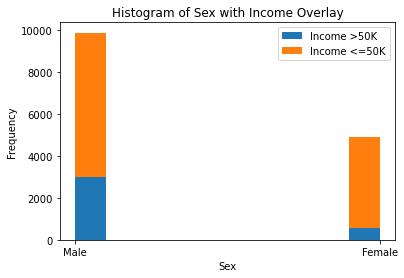

In [703]:
import numpy as np
import matplotlib.pyplot as plt

adult_sex_high = adult_re[adult_re.income == ">50K"]['sex']
adult_sex_low = adult_re[adult_re.income == "<=50K"]['sex']

plt.hist([adult_sex_high, adult_sex_low], bins=10, stacked=True)
plt.legend(['Income >50K', 'Income <=50K'])
plt.title("Histogram of Sex with Income Overlay")
plt.xlabel('Sex'); plt.ylabel('Frequency'); plt.show()

<ipython-input-704-b1f458b0e0be>:3: RuntimeWarning: invalid value encountered in true_divide
  n_norm_sex = n_table_sex / n_table_sex.sum(axis=1)[:,None]


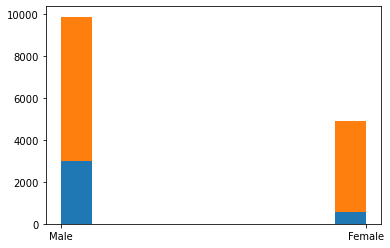

In [704]:
(n, bins, patches) = plt.hist([adult_sex_high, adult_sex_low], bins=10, stacked=True)
n_table_sex = np.column_stack((n[0], n[1]))
n_norm_sex = n_table_sex / n_table_sex.sum(axis=1)[:,None]
ourbins_sex = np.column_stack((bins[0:10], bins[1:11]))

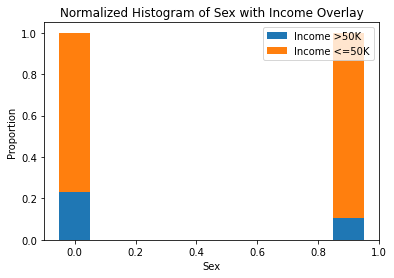

In [705]:
p1 = plt.bar(x=ourbins_sex[:,0], height=n_norm_sex[:,0], width=ourbins_sex[:,1]-ourbins_sex[:,0])
p2 = plt.bar(x=ourbins_sex[:,0], height=n_norm_sex[:,1], width=ourbins_sex[:,1]-ourbins_sex[:,0], bottom=n_norm_sex[:,0])

plt.legend(['Income >50K', 'Income <=50K'])
plt.title('Normalized Histogram of Sex with Income Overlay')
plt.xlabel('Sex'); plt.ylabel('Proportion'); 
plt.show()

# 4.59
Construct non-normalized and normalized bar graph of 'occupation' with 'sex' overlay

In [706]:
adult_re

,age,workclass-old,education,marital-status-old,occupation-old,sex,capital-gain,capital-loss,income,capital_loss_z,capital-loss-flag,capital-gain-flag,workclass,marital-status,occupation,age_binned
0,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Male,0.0,0.0,<=50K,-0.218014,0.0,0.0,Self-emp-not-inc,Married,Low-Level,Age 30-60
1,38.0,Private,9.0,Divorced,Handlers-cleaners,Male,0.0,0.0,<=50K,-0.218014,0.0,0.0,Private,Other,Low-Level,Age 30-60
2,49.0,Private,5.0,Married-spouse-absent,Other-service,Female,0.0,0.0,<=50K,-0.218014,0.0,0.0,Private,Other,Low-Level,Age 30-60
3,52.0,Self-emp-not-inc,9.0,Married-civ-spouse,Exec-managerial,Male,0.0,0.0,>50K,-0.218014,0.0,0.0,Self-emp-not-inc,Married,Mid-level,Age 30-60
4,31.0,Private,14.0,Never-married,Prof-specialty,Female,14084.0,0.0,>50K,-0.218014,0.0,1.0,Private,Other,Mid-level,Age 30-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,58.0,Private,9.0,Widowed,Adm-clerical,Female,0.0,0.0,<=50K,-0.218014,0.0,0.0,Private,Other,Low-Level,Age 30-60
14796,22.0,Private,9.0,Never-married,Adm-clerical,Male,0.0,0.0,<=50K,-0.218014,0.0,0.0,Private,Other,Low-Level,Age<30
<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


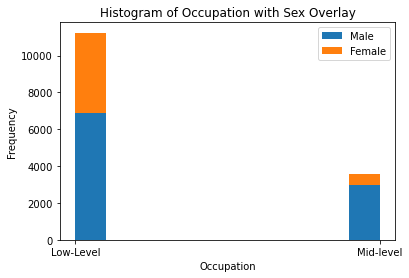

In [707]:
import numpy as np
import matplotlib.pyplot as plt

adult_occ_m = adult_re[adult_re.sex == "Male"]['occupation']
adult_occ_f = adult_re[adult_re.sex == "Female"]['occupation']

plt.hist([adult_occ_m, adult_occ_f], bins=10, stacked=True)
plt.legend(['Male', 'Female'])
plt.title("Histogram of Occupation with Sex Overlay")
plt.xlabel('Occupation'); plt.ylabel('Frequency'); plt.show()

<ipython-input-708-04b8ae5bfc78>:3: RuntimeWarning: invalid value encountered in true_divide
  n_norm_occ = n_table_occ / n_table_occ.sum(axis=1)[:,None]


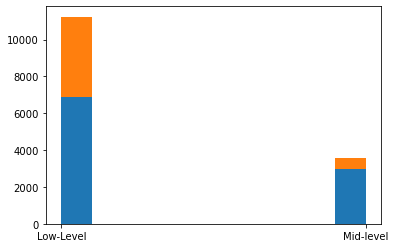

In [708]:
(n, bins, patches) = plt.hist([adult_occ_m, adult_occ_f], bins=10, stacked=True)
n_table_occ = np.column_stack((n[0], n[1]))
n_norm_occ = n_table_occ / n_table_occ.sum(axis=1)[:,None]
ourbins_occ = np.column_stack((bins[0:10], bins[1:11]))

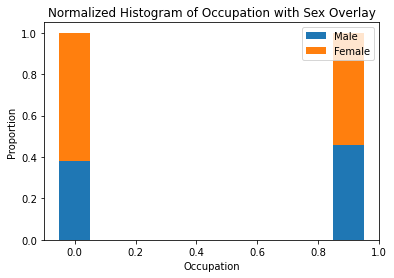

In [709]:
p1 = plt.bar(x=ourbins_occ[:,0], height=n_norm_occ[:,0], width=ourbins_occ[:,1]-ourbins_occ[:,0])
p2 = plt.bar(x=ourbins_occ[:,0], height=n_norm_occ[:,1], width=ourbins_occ[:,1]-ourbins_occ[:,0], bottom=n_norm_occ[:,0])

plt.legend(['Male', 'Female'])
plt.title('Normalized Histogram of Occupation with Sex Overlay')
plt.xlabel('Occupation'); plt.ylabel('Proportion'); 
plt.show()

# 4.60 ???????????????????
Construct Contingency Table with 'sex' for rows and 'occupation' for columns with counts and column percentages

In [712]:
crosstab_60 = pd.crosstab(adult_re['sex'], bank_train['occupation'])
crosstab_60

KeyError: 'occupation'

In [716]:
#round(crosstab_60.div(crosstab_60.sum(0), axis=1)*100, 1)